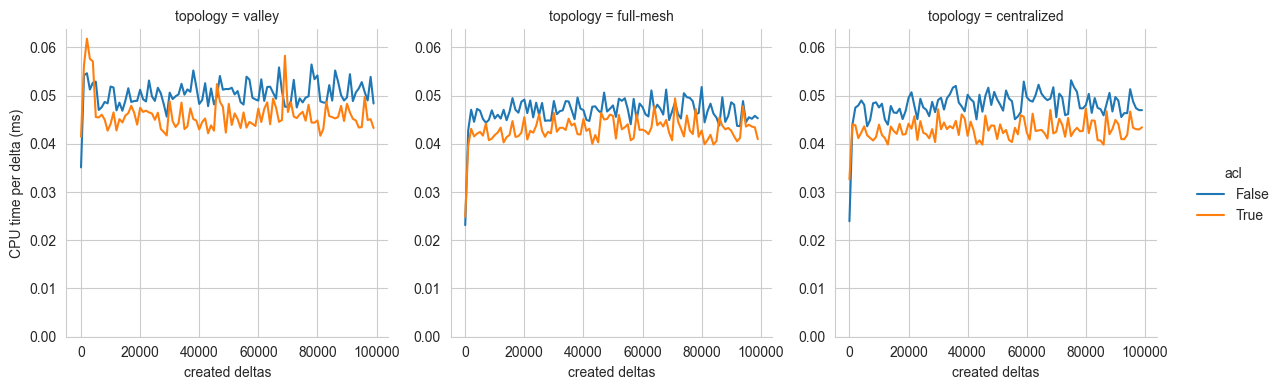

In [36]:
g = sns.FacetGrid(
    df,
    col="topology",
    hue="acl",
    col_wrap=3,
    height=4,
    sharey=True,
)
g.map(sns.lineplot, 'num_ops_before', "time_per_op_ms")
g.set_ylabels("CPU time per delta (ms)")
g.set_xlabels("created deltas")
g.add_legend()#(legend_data={False: "off", True: "on"}, title="ACL")
for ax in g.axes.flat:
    ax.yaxis.set_visible(True)
    ax.tick_params(axis='y', labelleft=True)
    #ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    #ax.ticklabel_format(axis='x', style='sci', scilimits=(-5, 5))


g.tight_layout()
plt.show()

In [17]:
# pip install seaborn jupyterlab

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
from pandas import DataFrame

# read https://jwalton.info/Embed-Publication-Matplotlib-Latex/ before publication
#sns.set_context("paper")

In [18]:
num_ops = 100000
df: DataFrame = pd.read_csv(f'lofi_acl/valley-4-{num_ops}-results.csv')
df.acl = df.acl.map(lambda v: v == 'acl')
df['time_per_op_ms'] = df.time_delta_ns.map(lambda x: x / 1_000_000 / 1000) # in ms avg for 1000
df

,topology,acl,num_ops_before,time_delta_ns,time_per_op_ms
0,valley,True,0,41477750,0.041478
1,valley,True,1000,56311875,0.056312
2,valley,True,2000,61810208,0.061810
3,valley,True,3000,57621208,0.057621
4,valley,True,4000,57107750,0.057108
...,...,...,...,...,...
595,centralized,False,95000,51330917,0.051331
596,centralized,False,96000,48757750,0.048758
597,centralized,False,97000,47382917,0.047383
598,centralized,False,98000,46989333,0.046989


In [28]:
avg_df = df.drop("num_ops_before", axis=1).drop("time_per_op_ms", axis=1).groupby(["topology", "acl"]).sum()
avg_df.rename(columns={"time_delta_ns": "time_avg_ms"}, inplace=True)
avg_df.time_avg_ms = avg_df.time_avg_ms.map(lambda x: x / 1_000_000 / num_ops)
avg_df

time_avg_ms
topology    acl               
centralized False     0.048023
            True      0.042862
full-mesh   False     0.046673
            True      0.042857
valley      False     0.050372
            True      0.046058

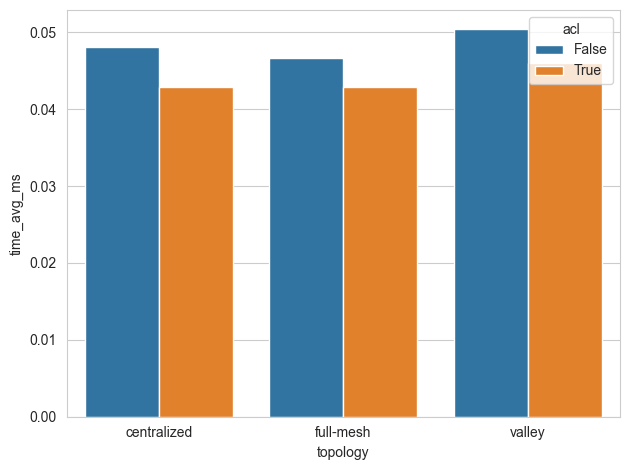

In [31]:
g = sns.barplot(avg_df, x="topology", y="time_avg_ms", hue="acl")
plt.tight_layout()
plt.show()